<a href="https://colab.research.google.com/github/JKEVIN2010/Deep-Learning-and-Early-Dementia-Detection/blob/main/Decipher_Dementia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img


In [ ]:
# Load the CSV file
file_path = 'cookie.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,utts,labels
0,142,well â€¡ the stool is falling over . the boy i...,0
1,355,these two little kids are getting cookies out ...,1
2,79,mhm . there is a boy and a girl and the boy is...,0
3,366,the girls trying ... did I get that ? and gir...,1
4,215,there is a girl waiting to get a cookie from I...,0


In [ ]:
# Preprocessing function to clean the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply the preprocessing to the speech transcripts
data['utts_cleaned'] = data['utts'].apply(preprocess_text)

# Using CountVectorizer to convert text to word frequency vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['utts_cleaned'])

# Convert the result to a DataFrame for better readability
word_frequency_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

word_frequency_df.head()


,about,above,absentmindedly,abstractly,accept,accident,accidents,according,across,act,...,yelling,yep,yes,yet,you,young,younger,youngster,youngsters,your
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


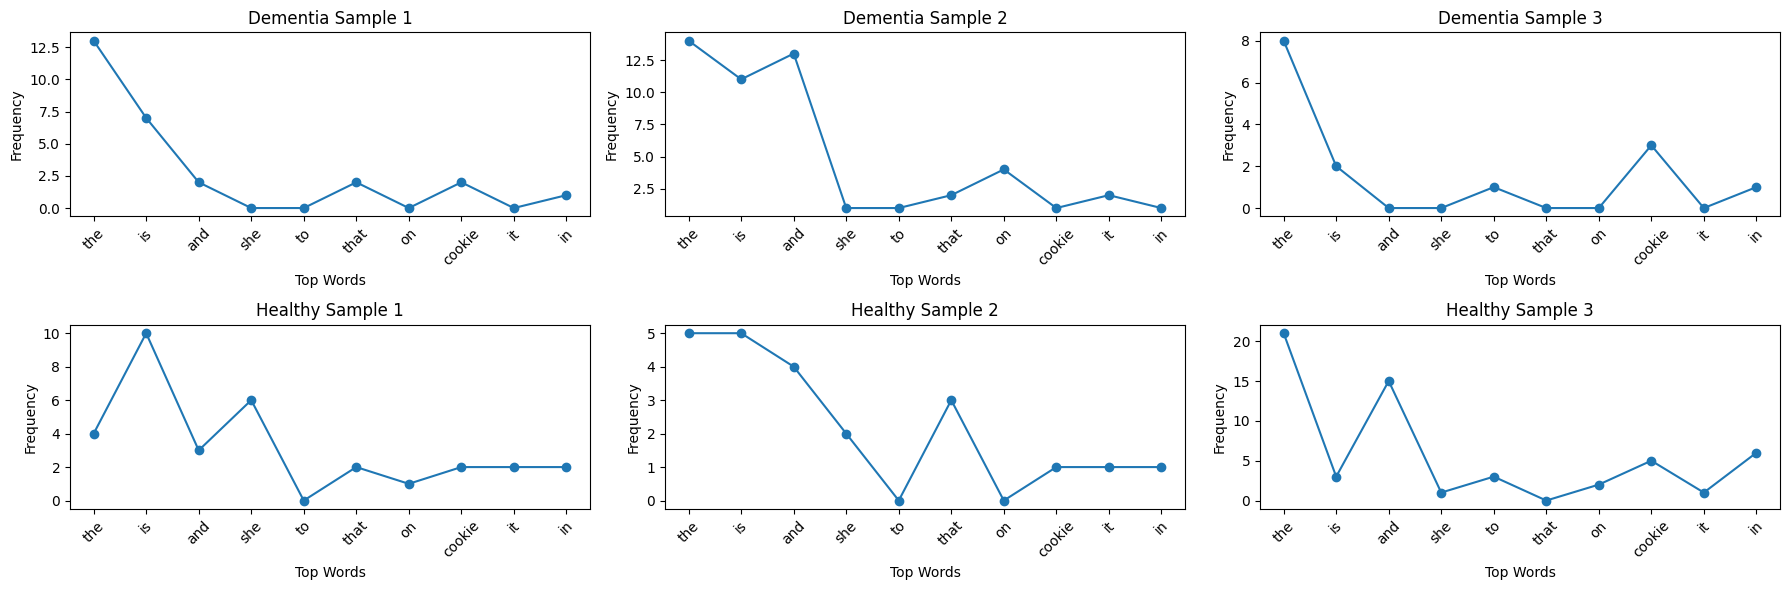

In [ ]:
# Select the top 10 most frequent words in the entire dataset
N = 10
top_n_words = word_frequency_df.sum().sort_values(ascending=False).head(N).index

# Extract samples
dementia_samples = word_frequency_df[data['labels'] == 0].head(3)
healthy_samples = word_frequency_df[data['labels'] == 1].head(3)

# Extract only the top N words for the samples
dementia_top_words = dementia_samples[top_n_words]
healthy_top_words = healthy_samples[top_n_words]

# Plotting
plt.figure(figsize=(18, 6))
for i in range(3):
    # Dementia sample plot
    plt.subplot(2, 3, i+1)
    plt.plot(dementia_top_words.columns, dementia_top_words.iloc[i, :], marker='o')
    plt.title(f'Dementia Sample {i+1}')
    plt.xticks(rotation=45)
    plt.xlabel('Top Words')
    plt.ylabel('Frequency')

    # Healthy sample plot
    plt.subplot(2, 3, i+4)
    plt.plot(healthy_top_words.columns, healthy_top_words.iloc[i, :], marker='o')
    plt.title(f'Healthy Sample {i+1}')
    plt.xticks(rotation=45)
    plt.xlabel('Top Words')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




In [ ]:
# Assuming 'word_frequency_df' is your DataFrame
# Normalize your data
normalized_data = (word_frequency_df - word_frequency_df.min()) / (word_frequency_df.max() - word_frequency_df.min())

# Convert to numpy array
data_array = normalized_data.to_numpy()


In [ ]:
def calculate_recurrence_matrix(time_series, factor=1.0):
    std_dev = np.std(time_series)
    threshold = factor * std_dev  # Threshold as a factor of the standard deviation
    N = len(time_series)
    recurrence_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if abs(time_series[i] - time_series[j]) <= threshold:
                recurrence_matrix[i][j] = 1
    return recurrence_matrix



In [ ]:
# Function to plot recurrence
def plot_recurrence_matrix(recurrence_matrix, title, label):
    plt.imshow(recurrence_matrix, cmap='Greys', origin='lower')
    plt.colorbar(label='Recurrence')
    plt.title(f"{title} - {label}")
    plt.xlabel('Time')
    plt.ylabel('Time')
    plt.show()

# Function to save recurrence plots
def save_recurrence_plot(recurrence_matrix, title, label, file_name):
    plt.imshow(recurrence_matrix, cmap='Greys', origin='lower')
    plt.colorbar(label='Recurrence')
    plt.title(f"{title} - {label}")
    plt.xlabel('Time')
    plt.ylabel('Time')
    plt.savefig(file_name)
    plt.close()




In [ ]:
# Create a directory in the Colab environment
recurrence_plots_dir = '/content/recurrence_plots'
os.makedirs(recurrence_plots_dir, exist_ok=True)


In [ ]:
# Plot and save recurrence matrices for all samples
for i, sample in enumerate(data_array):
    label = 'Dementia' if data['labels'][i] == 0 else 'Healthy'
    recurrence_matrix = calculate_recurrence_matrix(sample)  # 'factor' argument removed
    file_name = f'{recurrence_plots_dir}/sample_{i}_{label}.png'
    save_recurrence_plot(recurrence_matrix, f"Sample {i}", label, file_name)


In [ ]:
# Count the number of png files in the recurrence plots folder
# We want to make sure that we have analyzed 552 transcripts

# Define the directory path
recurrence_plots_dir = '/content/recurrence_plots'

# Initialize a counter for PNG files
png_file_count = 0

# Check if the directory exists
if os.path.exists(recurrence_plots_dir):
    # Iterate over all files in the directory
    for file in os.listdir(recurrence_plots_dir):
        if file.endswith(".png"):
            png_file_count += 1

    print(f"Number of PNG files in '{recurrence_plots_dir}': {png_file_count}")
else:
    print(f"Directory '{recurrence_plots_dir}' does not exist.")

Number of PNG files in '/content/recurrence_plots': 552


In [ ]:
# Function to load images
def load_images(image_folder, target_size=(128, 128)):
    images = []
    labels = []  # 0 for dementia, 1 for healthy
    for file_name in os.listdir(image_folder):
        if file_name.endswith('.png'):
            img_path = os.path.join(image_folder, file_name)
            img = load_img(img_path, target_size=target_size, color_mode='grayscale')
            img_array = img_to_array(img)
            images.append(img_array)

            # Assuming file naming convention: 'sample_{index}_{label}.png'
            label = 0 if 'Dementia' in file_name else 1
            labels.append(label)

    return np.array(images), np.array(labels)

image_folder = '/content/recurrence_plots'
images, labels = load_images(image_folder)


In [ ]:
# Design an Autoencoder Architecture
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

input_img = Input(shape=(128, 128, 1))  # Adjust to your image size

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2320  

In [ ]:
# Train the Autoencoder on the dataset
from tensorflow.keras.utils import normalize

# Normalize the images
normalized_images = normalize(images, axis=1)

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels, test_size=0.2, random_state=42)

# Train the autoencoder
history = autoencoder.fit(X_train, X_train,
                epochs=300,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))


Epoch 1/300
4/4 [==============================] - 13s 271ms/step - loss: 0.6857 - val_loss: 0.6666
Epoch 2/300
4/4 [==============================] - 0s 26ms/step - loss: 0.6514 - val_loss: 0.6056
Epoch 3/300
4/4 [==============================] - 0s 24ms/step - loss: 0.5709 - val_loss: 0.4760
Epoch 4/300
4/4 [==============================] - 0s 26ms/step - loss: 0.4202 - val_loss: 0.3067
Epoch 5/300
4/4 [==============================] - 0s 25ms/step - loss: 0.2882 - val_loss: 0.3010
Epoch 6/300
4/4 [==============================] - 0s 26ms/step - loss: 0.3154 - val_loss: 0.3198
Epoch 7/300
4/4 [==============================] - 0s 25ms/step - loss: 0.3048 - val_loss: 0.2737
Epoch 8/300
4/4 [==============================] - 0s 25ms/step - loss: 0.2670 - val_loss: 0.2639
Epoch 9/300
4/4 [==============================] - 0s 25ms/step - loss: 0.2661 - val_loss: 0.2679
Epoch 10/300
4/4 [==============================] - 0s 26ms/step - loss: 0.2647 - val_loss: 0.2554
Epoch 11/300
4/4 

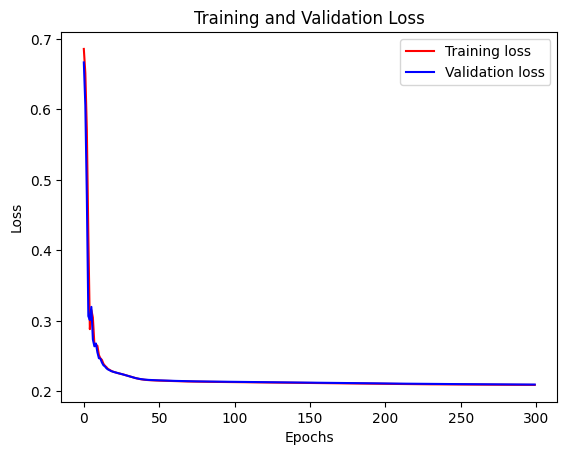

In [ ]:
# Extract the training loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs (using early stoping the optimal number of epochs is 294)
epochs = range(len(loss))

# Create a line plot for training loss and validation loss
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Visualize the Neurons
# Assuming 'autoencoder' is your trained autoencoder model
# and 'encoded' is the output of your encoder layers

encoder = Model(input_img, encoded)
encoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
Total params: 4944 (19.31 KB)
Trainable params: 4944 (19.31

In [ ]:
# Select a few images for Visualization
# Assuming X_test contains your test images
# Select a few images for visualization (first 10 images for example)
selected_images = X_test[:10]  # Adjust the number as needed


In [ ]:
# Generate encoded representation
## We will pass these images through the encoder to get the encoded representations
encoded_images = encoder.predict(selected_images)

# Print the shape of the encoded images
print("Shape of encoded representations:", encoded_images.shape)


1/1 [==============================] - 0s 104ms/step
Shape of encoded representations: (10, 32, 32, 16)


In [ ]:
def save_and_label_encoded_images(encoded_images, original_labels, file_names, save_directory):
    n = len(encoded_images)  # Number of images to display
    plt.figure(figsize=(20, 8))

    for i in range(n):
        label = 'Dementia' if original_labels[i] == 0 else 'Healthy'

        # Display encoded image
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(encoded_images[i].reshape(-1, encoded_dimension), cmap='viridis', interpolation='nearest')
        plt.title(f'{label} Sample')
        plt.colorbar()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Save the image with high DPI
        plt.savefig(f'{save_directory}/{file_names[i]}', dpi=300)

    plt.show()



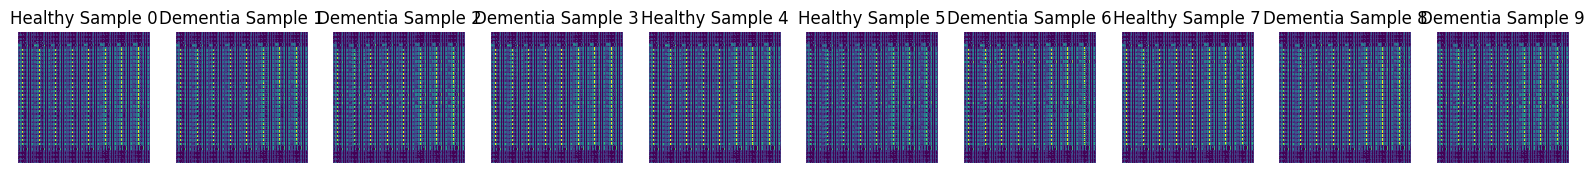

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'encoded_images' is a list of arrays representing the encoded images
# and 'labels' is a list of the corresponding labels (0 for dementia, 1 for healthy)

# Set the size of the images and DPI for saving the plots
image_size = (128, 128)  # Adjust as needed
dpi = 300  # Dots per inch for image quality

# Create a figure and axis for each image
n = len(encoded_images)  # Number of images to display
plt.figure(figsize=(20, 8))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_images[i].reshape(image_size), cmap='viridis', interpolation='nearest')
    # Set title with the label
    title = 'Dementia' if labels[i] == 0 else 'Healthy'
    plt.title(f"{title} Sample {i}")
    plt.axis('off')

    # Save the plot as an image file
    plt.savefig(f"neuron_visualization_{title}_{i}.png", dpi=dpi, bbox_inches='tight')

plt.show()


In [ ]:
# Assuming encoded_images is a numpy array containing your encoded images
# Let's get the size of the encoded images from the shape of the first encoded image
encoded_dimension = encoded_images[0].shape[0]  # This assumes the encoded images are square

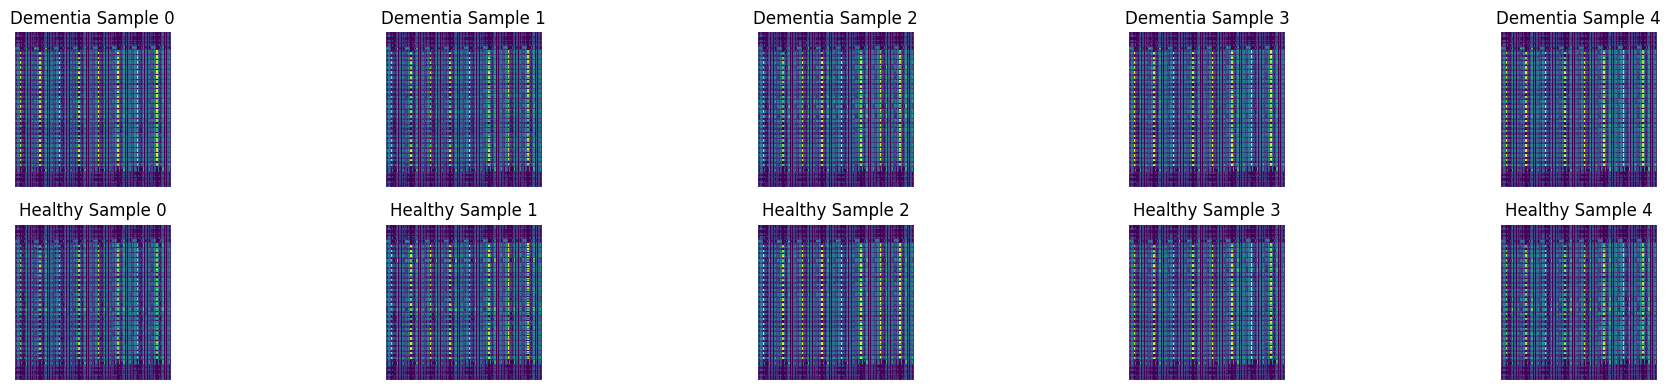

In [ ]:
def plot_and_label_encoded_images(encoded_images, labels, zoom_factor=2):
    # Determine the size of the encoded images for reshaping
    image_size = int(np.sqrt(encoded_images[0].size))

    # Find the indices for dementia and healthy samples
    dementia_indices = np.where(labels == 0)[0]
    healthy_indices = np.where(labels == 1)[0]

    # Determine how many samples to display (up to 10 of each, but not exceeding the number of encoded images)
    n = min(min(len(dementia_indices), len(healthy_indices), 10), len(encoded_images) // 2)

    # Plot the images
    plt.figure(figsize=(20, 4))

    # Plot available dementia samples
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        if i < len(encoded_images):
            dementia_img = encoded_images[i].reshape((image_size, image_size))
            plt.imshow(dementia_img, cmap='viridis', interpolation='nearest')
            plt.title(f'Dementia Sample {i}')
            plt.axis('off')

    # Plot available healthy samples
    for i in range(n):
        ax = plt.subplot(2, n, n + i + 1)
        if n + i < len(encoded_images):
            healthy_img = encoded_images[n + i].reshape((image_size, image_size))
            plt.imshow(healthy_img, cmap='viridis', interpolation='nearest')
            plt.title(f'Healthy Sample {i}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Use the function to plot the images
plot_and_label_encoded_images(encoded_images, labels, zoom_factor=2)


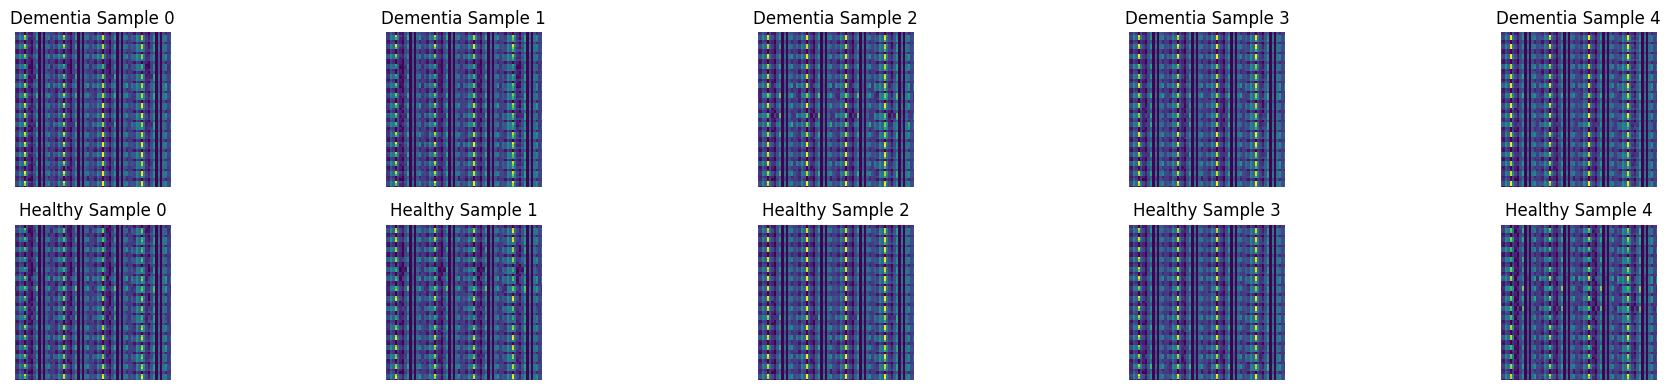

In [ ]:
# Zoomed in plots
def plot_and_label_encoded_images_with_zoom(encoded_images, labels, zoom_factor=2):
    # Determine the size of the encoded images for reshaping
    image_size = int(np.sqrt(encoded_images[0].size))

    # Calculate the range for zooming
    center = image_size // 2
    half_size = image_size // (2 * zoom_factor)
    zoom_range = (center - half_size, center + half_size)

    # Find the indices for dementia and healthy samples
    dementia_indices = np.where(labels == 0)[0]
    healthy_indices = np.where(labels == 1)[0]

    # Determine how many samples to display
    n = min(min(len(dementia_indices), len(healthy_indices), 10), len(encoded_images) // 2)

    # Plot the images with zoom
    plt.figure(figsize=(20, 4))

    # Plot available dementia samples
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        if i < len(encoded_images):
            dementia_img = encoded_images[i].reshape((image_size, image_size))
            plt.imshow(dementia_img, cmap='viridis', interpolation='nearest')
            ax.set_xlim(zoom_range)
            ax.set_ylim(zoom_range)
            plt.title(f'Dementia Sample {i}')
            plt.axis('off')

    # Plot available healthy samples
    for i in range(n):
        ax = plt.subplot(2, n, n + i + 1)
        if n + i < len(encoded_images):
            healthy_img = encoded_images[n + i].reshape((image_size, image_size))
            plt.imshow(healthy_img, cmap='viridis', interpolation='nearest')
            ax.set_xlim(zoom_range)
            ax.set_ylim(zoom_range)
            plt.title(f'Healthy Sample {i}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Use the function to plot and zoom in on the images
plot_and_label_encoded_images_with_zoom(encoded_images, labels, zoom_factor=2)


In [ ]:
# PCA plot for all the samples
# Encode all samples
encoded_images_all = encoder.predict(normalized_images)

18/18 [==============================] - 0s 4ms/step


In [ ]:
# Flatten the encoded images and apply PCA
n_samples = encoded_images_all.shape[0]
flattened_images_all = encoded_images_all.reshape((n_samples, -1))

pca = PCA(n_components=2)
pca_results_all = pca.fit_transform(flattened_images_all)



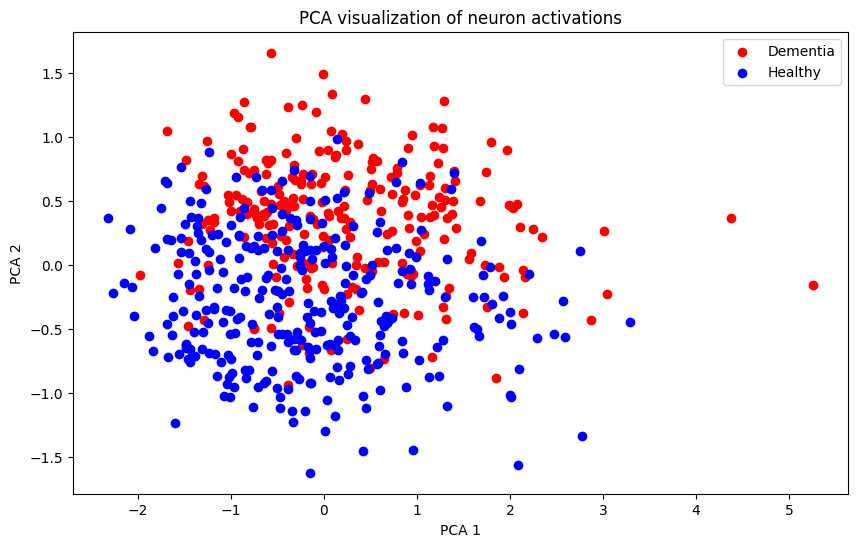

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Flatten and apply PCA
n_samples = encoded_images_all.shape[0]
flattened_images_all = encoded_images_all.reshape((n_samples, -1))
pca = PCA(n_components=2)
pca_results_all = pca.fit_transform(flattened_images_all)

# Separate PCA results based on labels
dementia_pca = pca_results_all[labels == 0]
healthy_pca = pca_results_all[labels == 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(dementia_pca[:, 0], dementia_pca[:, 1], c='red', label='Dementia')
plt.scatter(healthy_pca[:, 0], healthy_pca[:, 1], c='blue', label='Healthy')

plt.legend()
plt.title('PCA visualization of neuron activations')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


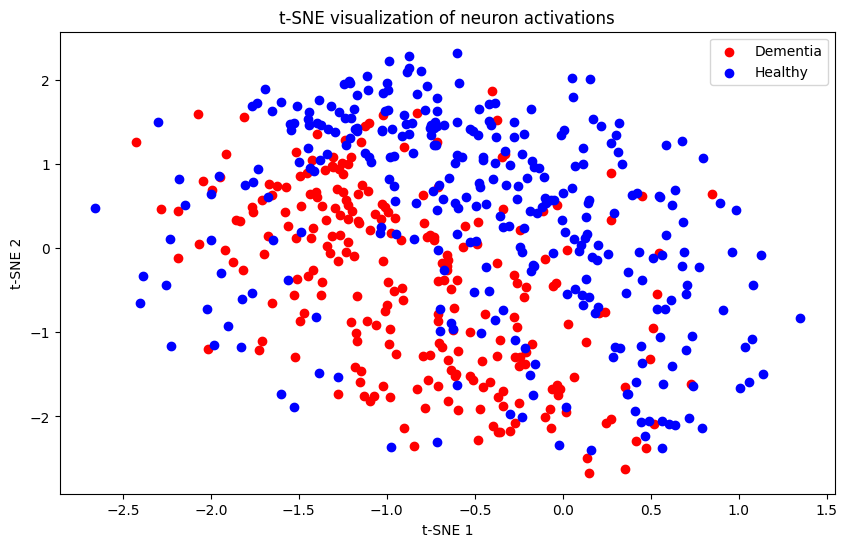

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to the flattened images
tsne = TSNE(n_components=2, perplexity=300, n_iter=1000, random_state=42)
tsne_results_all = tsne.fit_transform(flattened_images_all)

# Separate t-SNE results based on labels
dementia_tsne = tsne_results_all[labels == 0]
healthy_tsne = tsne_results_all[labels == 1]

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(dementia_tsne[:, 0], dementia_tsne[:, 1], c='red', label='Dementia')
plt.scatter(healthy_tsne[:, 0], healthy_tsne[:, 1], c='blue', label='Healthy')

plt.legend()
plt.title('t-SNE visualization of neuron activations')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


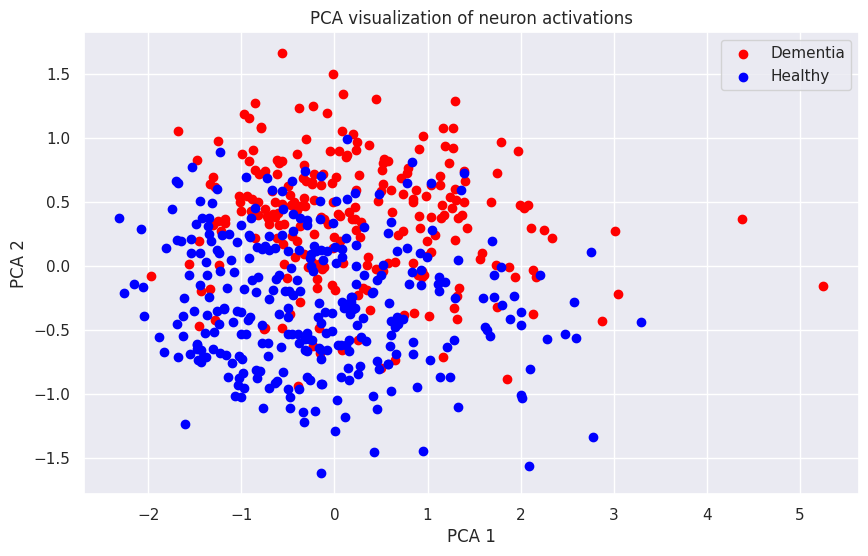

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply Seaborn style
sns.set(style="darkgrid")

# Perform PCA (assuming you've already done this)
# pca_results_all = ...

# Separate PCA results based on labels (assuming labels is your label array)
dementia_pca = pca_results_all[labels == 0]
healthy_pca = pca_results_all[labels == 1]

# Plot PCA results with Seaborn's improved aesthetics
plt.figure(figsize=(10, 6))
plt.scatter(dementia_pca[:, 0], dementia_pca[:, 1], c='red', label='Dementia')
plt.scatter(healthy_pca[:, 0], healthy_pca[:, 1], c='blue', label='Healthy')

plt.legend()
plt.title('PCA visualization of neuron activations')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


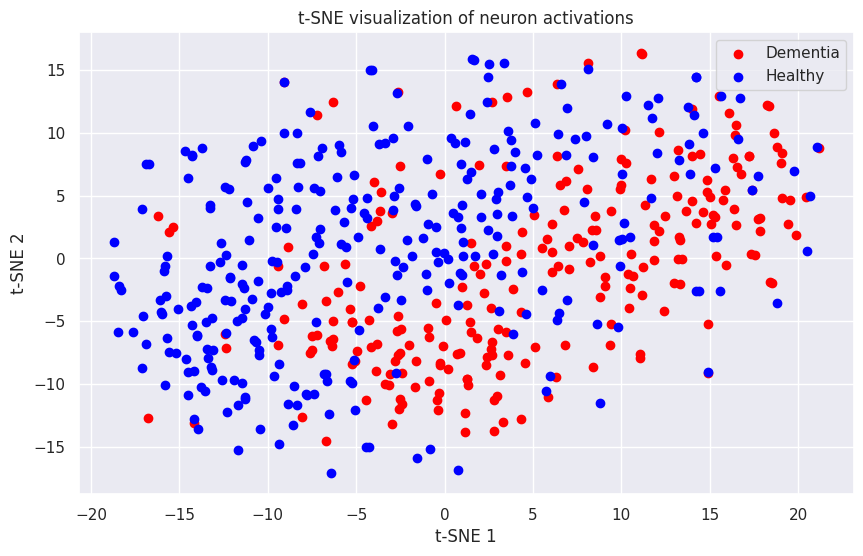

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply Seaborn style
sns.set(style="darkgrid")

# Apply t-SNE to the flattened images (assuming this is already done)
# Apply t-SNE to the flattened images
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
tsne_results_all = tsne.fit_transform(flattened_images_all)

# Separate t-SNE results based on labels
dementia_tsne = tsne_results_all[labels == 0]
healthy_tsne = tsne_results_all[labels == 1]

# Plot t-SNE results with Seaborn's improved aesthetics
plt.figure(figsize=(10, 6))
plt.scatter(dementia_tsne[:, 0], dementia_tsne[:, 1], c='red', label='Dementia')
plt.scatter(healthy_tsne[:, 0], healthy_tsne[:, 1], c='blue', label='Healthy')

plt.legend()
plt.title('t-SNE visualization of neuron activations')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()
